<a href="https://colab.research.google.com/github/LucasIBoczkowski/CoderHouse/blob/main/NLP%20%26%20Deep%20Learning/Activity%201%20-%20NLP%20Workshop/Activity_1_NLP_European_Restaurant_Reviews_(Lucas_Boczkowski).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP
## Activity 1: Text Preprocessing

### Lucas Boczkowski
#### CoderHouse - Comisión 60900 (2024)

## 1. The Problem

**The Context**

Customer reviews represent an essential source of feedback for any business, like restaurants. They help business owners and managers understand customer preferences, identify strengths and weaknesses, and improve their products and services. By analyzing these reviews, we can gain insights into customer sentiment and overall dining experiences.

The intention of this project is to work with a dataset that contains reviews written by customers of several European restaurants. These reviews are categorized into two parts: positive and negative, highlighting the sentiment of the customer feedback. Reviews play a crucial role in the reputation and success of restaurants, as they provide valuable insights into customer satisfaction and areas for improvement.

**The Content**

The dataset has 6 columns:

- Country: The country where the restaurant is located.
- Restaurant Name: The name of the restaurant being reviewed.
- Sentiment: The sentiment of the review (Positive/Negative).
- Review Title: The headline or title of the review.
- Review Date: The date when the review was posted.
- Review: The detailed content of the review.


**The Objective**

The primary objective of this analysis is to preprocess the review texts to create a corpus that can be used for various Natural Language Processing (NLP) tasks. These tasks may include tokenization, stemming, lemmatization, and sentiment analysis. By transforming the raw text data into a structured format, we aim to extract meaningful insights and patterns that can help improve the customer experience at these restaurants.

## 2. Libraries to be used and file loading

Let's define the libraries needed.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Text processing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Ensure necessary NLTK data files are downloaded
nltk.download('punkt')  # Tokenizers
nltk.download('stopwords')  # Stop words
nltk.download('wordnet')  # WordNet lemmatizer

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Utility libraries
from collections import Counter

# Requests if you need to fetch data from a URL
import requests

# Setting up visualization styles
sns.set(style="whitegrid")
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Let's connect to the file.

In [3]:
# URL of the CSV file on my GitHub profile
github_url = 'https://raw.githubusercontent.com/LucasIBoczkowski/CoderHouse/main/NLP%20%26%20Deep%20Learning/Activity%201%20-%20NLP%20Workshop/European%20Restaurant%20Reviews.csv'

# Read the CSV file from the URL
df_reviews = pd.read_csv(github_url)

print("Let's see the top rows of our dataset:")
df_reviews.head()


Let's see the top rows of our dataset:


,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


## 3. The corpus

Let's create the corpus wth the text we have in the Reviews columns, which will be useful for further analysis.

In [4]:
# Extract the "Review" column
reviews = df_reviews['Review']

# Combine all reviews into a single string for a corpus
corpus = ' '.join(reviews.dropna())

# Just in case, let's keep reviews as a list of strings
corpus_list = reviews.dropna().tolist()

# Display the first few reviews to ensure the corpus is created correctly
print(corpus_list[:5])

['The manager became agressive when I said the carbonara was not good. She was rude. It was  a very bad experience. The worst in Rome in many years.', 'I ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20 minutes they brought me another steak that was completely rare, I left all the steak , and they asked me about it but charged me the fool price.', 'This is an attractive venue with welcoming, albeit but somewhat slow service. The offerings are pleasingly presented but most everything has no taste. It was as though ingredients were just assembled without seasoning: a lovely restaurant, except for the food.', 'Sadly I  used the high TripAdvisor rating too literally. We have been fortunate to eat at a number of fine restaurants so  know that amazing buzz from  a mouthful of fine freshly cooked food from a great chef.\nNever before have we eaten a tasting menu and never will we again.\nAd Hoc has a great a

## 4. Preprocessing

### Tokenization

Let's tokenize the corpus

In [5]:
# Tokenization
tokens = word_tokenize(corpus)

# Show the first 50 tokens
print(tokens[:50])

['The', 'manager', 'became', 'agressive', 'when', 'I', 'said', 'the', 'carbonara', 'was', 'not', 'good', '.', 'She', 'was', 'rude', '.', 'It', 'was', 'a', 'very', 'bad', 'experience', '.', 'The', 'worst', 'in', 'Rome', 'in', 'many', 'years', '.', 'I', 'ordered', 'a', 'beef', 'fillet', 'ask', 'to', 'be', 'done', 'medium', ',', 'I', 'got', 'it', 'well', 'done', 'cooked', 'and']


### Lowercase

Let's work only with lowercase and remove punctuations

In [6]:
# Convert to lowercase and remove punctuation
tokens = [word.lower() for word in tokens if word.isalpha()]

# Show the first 500 characters in the corpus with lowercase
print(tokens[:500])

['the', 'manager', 'became', 'agressive', 'when', 'i', 'said', 'the', 'carbonara', 'was', 'not', 'good', 'she', 'was', 'rude', 'it', 'was', 'a', 'very', 'bad', 'experience', 'the', 'worst', 'in', 'rome', 'in', 'many', 'years', 'i', 'ordered', 'a', 'beef', 'fillet', 'ask', 'to', 'be', 'done', 'medium', 'i', 'got', 'it', 'well', 'done', 'cooked', 'and', 'very', 'dry', 'when', 'i', 'told', 'them', 'they', 'took', 'the', 'steak', 'and', 'after', 'minutes', 'they', 'brought', 'me', 'another', 'steak', 'that', 'was', 'completely', 'rare', 'i', 'left', 'all', 'the', 'steak', 'and', 'they', 'asked', 'me', 'about', 'it', 'but', 'charged', 'me', 'the', 'fool', 'price', 'this', 'is', 'an', 'attractive', 'venue', 'with', 'welcoming', 'albeit', 'but', 'somewhat', 'slow', 'service', 'the', 'offerings', 'are', 'pleasingly', 'presented', 'but', 'most', 'everything', 'has', 'no', 'taste', 'it', 'was', 'as', 'though', 'ingredients', 'were', 'just', 'assembled', 'without', 'seasoning', 'a', 'lovely', 're

### Stopwords

Let's remove the stopwords in our Reviews

In [7]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

### Stemming and Lemmatization

Initialize and apply stemmer and lemmatizer

In [8]:
# Initialization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming and lemmatization
stemmed_tokens = [stemmer.stem(token) for token in tokens]
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

# Display the first 10 results
print("Stemmed Tokens:", stemmed_tokens[:10])
print("Lemmatized Tokens:", lemmatized_tokens[:10])

Stemmed Tokens: ['manag', 'becam', 'agress', 'said', 'carbonara', 'good', 'rude', 'bad', 'experi', 'worst']
Lemmatized Tokens: ['manager', 'became', 'agressive', 'said', 'carbonara', 'good', 'rude', 'bad', 'experience', 'worst']


## 5. Data exploration

### Overview

Let's do some high level analysis to explore and understand our reviews file.

In [9]:
# Basic statistics
print(df_reviews.describe())

       Country            Restaurant Name Sentiment Review Title Review Date  \
count     1502                       1502      1502         1502        1502   
unique       7                          7         2         1343         143   
top     France  The Frog at Bercy Village  Positive    Excellent  May 2014 •   
freq       512                        512      1237            9         108   

                                                   Review  
count                                                1502  
unique                                               1426  
top     I'm afraid we were very let down by this resta...  
freq                                                    4  


In [10]:
# Check for missing values
print(df_reviews.isnull().sum())

Country            0
Restaurant Name    0
Sentiment          0
Review Title       0
Review Date        0
Review             0
dtype: int64


In [11]:
# Overview of the dataset
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1502 non-null   object
 1   Restaurant Name  1502 non-null   object
 2   Sentiment        1502 non-null   object
 3   Review Title     1502 non-null   object
 4   Review Date      1502 non-null   object
 5   Review           1502 non-null   object
dtypes: object(6)
memory usage: 70.5+ KB
None


### Sentiment distribution

Let's see a distribution of the sentiments, by visualizing the distribution of positive and negative sentiments.

<ipython-input-12-cca67ad3307a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_reviews, palette='viridis')


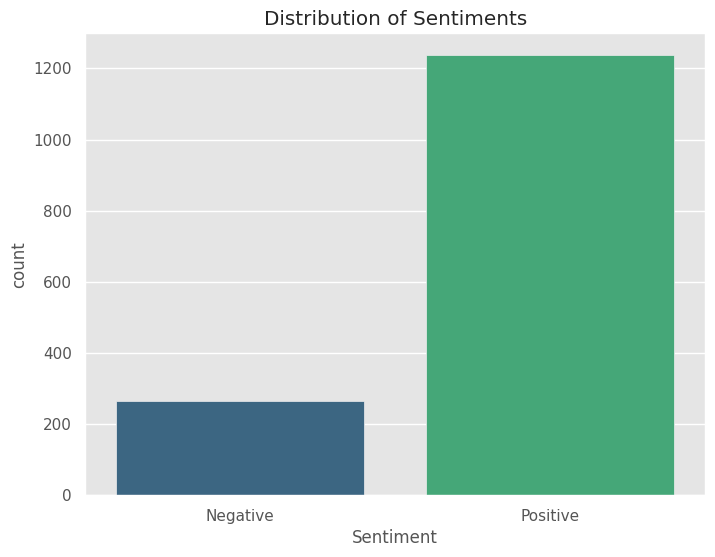

In [12]:
# Count plot for sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df_reviews, palette='viridis')
plt.title('Distribution of Sentiments')
plt.show()

### Word cloud

Let's do a word cloud of the reviews in order to visualize the most common words we have.

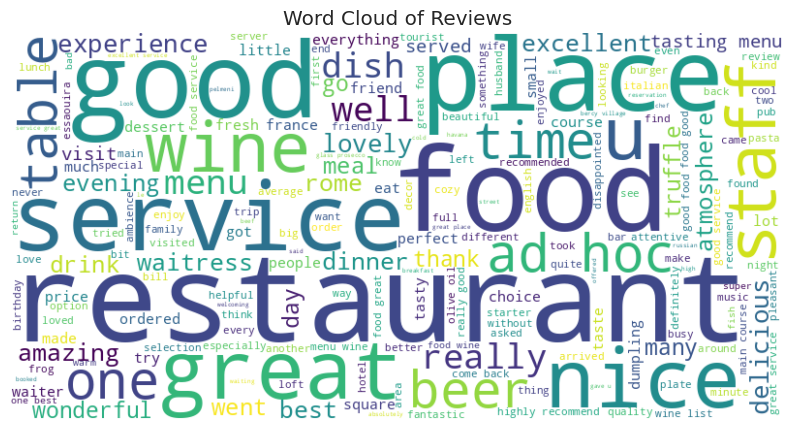

In [13]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(lemmatized_tokens))
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

### Top 10 most common words

Let's identify the top 10 most common words in the reviews, removing the punctuation and stopwords first.

In [14]:
# Count the most common words
word_counts = Counter(lemmatized_tokens)
common_words = word_counts.most_common(10)

# Display the most common words
print("Most common words:", common_words)

Most common words: [('food', 995), ('service', 691), ('restaurant', 685), ('good', 666), ('great', 623), ('place', 518), ('wine', 506), ('u', 426), ('menu', 417), ('nice', 394)]


### Frequency of the top 10 most common words

Let's see the top 10 most common words in a graph, without stopwords.

<ipython-input-15-d918f9975d6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')


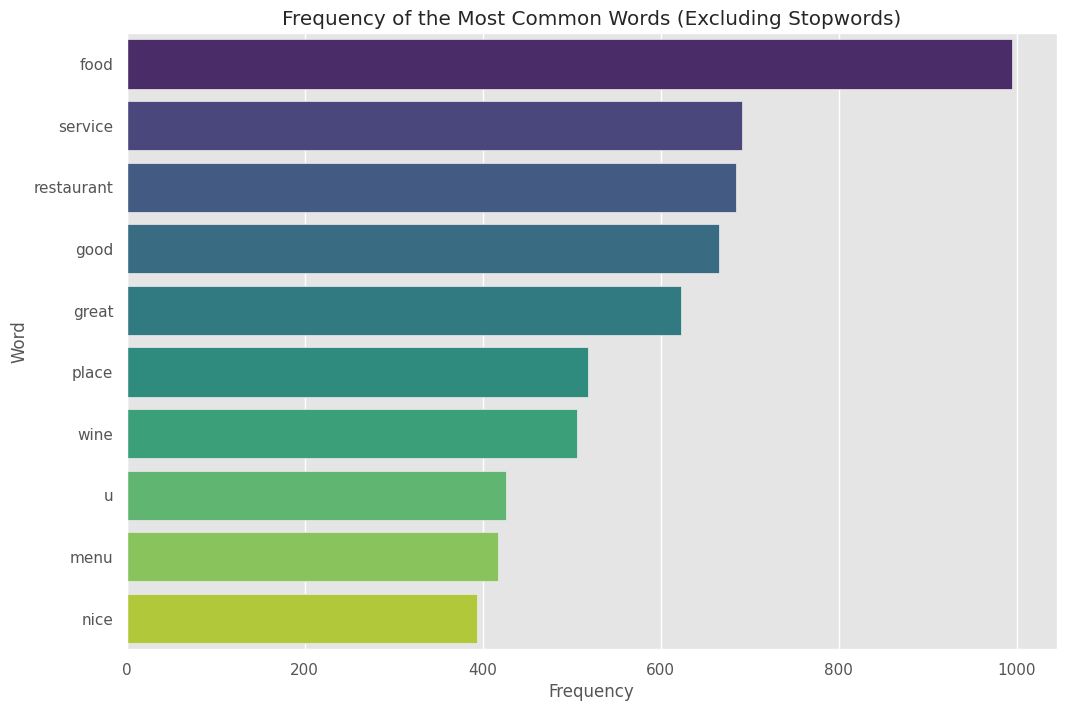

In [15]:
# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the frequency of the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')
plt.title('Frequency of the Most Common Words (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()